# Energy dependencies
The raw input for the resolution of the energy and angle, as well as the hadronic cascade light yield reduction, given the deposited resolution is not at hand. We therefore take data points from published plots as shown below.

In [7]:
from energy_dependencies import *
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 8.0)

## Energy resolution
The input for the energy resolution is taken from https://arxiv.org/pdf/1311.4767.pdf, Fig. 13a (dashed line). We take the lower boundary value when evaluating below the interpolation range and a function linear in $log(E_\mathrm{dep})$ when above.

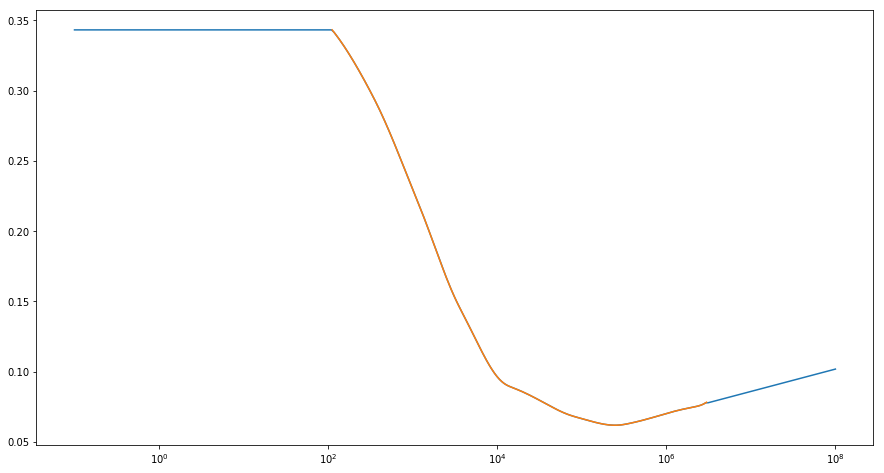

In [11]:
eres = get_eres_exinterpolator()
xe = np.logspace(-1, 8, 300)
plt.semilogx(xe, eres(xe))
xi = np.logspace(np.log10(eres.lower),
                np.log10(eres.upper),
                200)
plt.semilogx(xi, eres(xi))

## Angular resolution

The data points for the angular resolution are taken from https://arxiv.org/pdf/1311.4767.pdf, Fig. 14 (solid line). As the energy range is rather small, we expand it by defining a model to evaluate outside of the interpolation range. For this model we choose a complementary error function in $log(E_\mathrm{dep})$ with an upper limit at 180°.

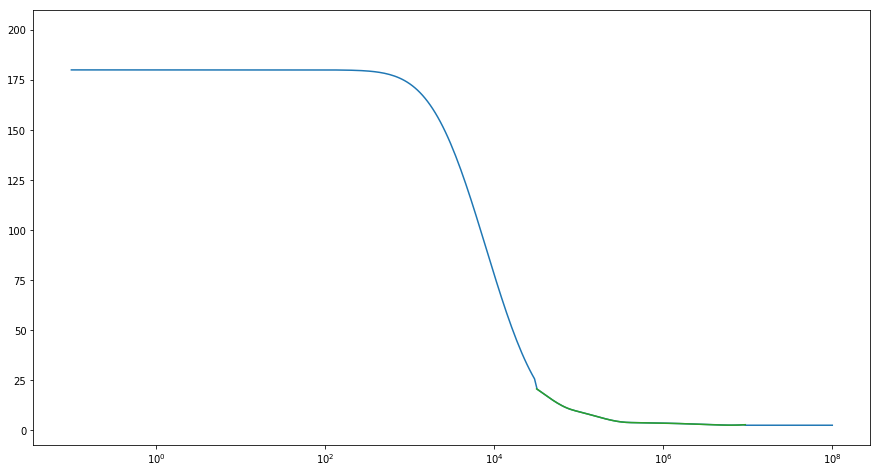

In [12]:
angres = get_angres_exinterpolator()
plt.semilogx(xe, angres(xe),200)
xa = np.logspace(np.log10(angres.lower),
                np.log10(angres.upper),
                200)
plt.semilogx(xa, angres(xa))

## Hadronic cascade light yield reduction factor
The light yield of a hadronic cascade is reduced when compared to a electromagnetic cascade of the same energy. We take Fig. 2.2 (pg. 24) in https://dspace.sunyconnect.suny.edu/handle/1951/59808 for this input. For a given deposited energy we generate a random value according to a Gaussian distribution with a mean and variance given by the interpolated input. Outside the range we use the boundary values.

In [17]:
hadr_scaling_factor = get_hadronic_scaling_factor()

xh = np.logspace(np.log10(hadr_scaling_factor.mean.lower),
                np.log10(hadr_scaling_factor.mean.upper),
                100)
"""Generate mutliple random values in logspace"""
x_y = []
y = []
for i in xh:
    n = 5
    for j in range(n):
        x_y.append(i)
        y.append(hadr_scaling_factor.gen_value(i))

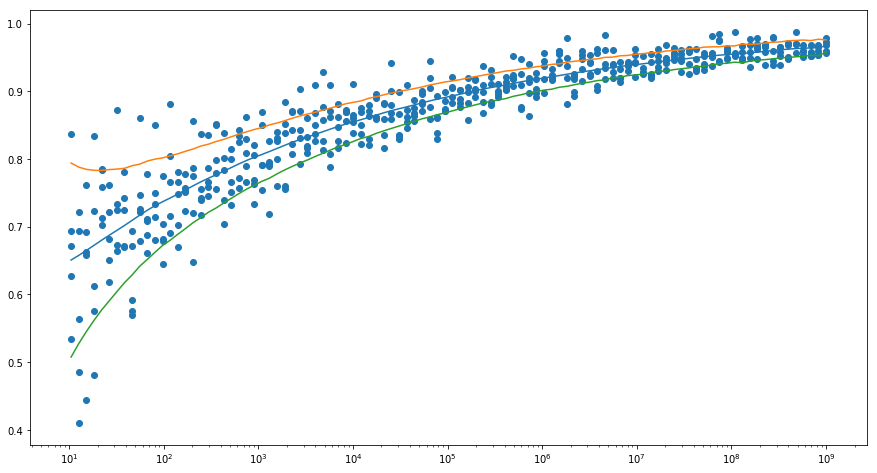

In [18]:
plt.semilogx(xh, hadr_scaling_factor.mean(xh))
plt.plot(xh, hadr_scaling_factor.mean(xh) + hadr_scaling_factor.sigma(xh))
plt.plot(xh, hadr_scaling_factor.mean(xh) - hadr_scaling_factor.sigma(xh))
plt.scatter(x_y, y)